<a href="https://colab.research.google.com/github/karthiklakkur1/Crop-weed-extension/blob/main/plantvillage_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adilmubashirchaudhry/plant-village-dataset")

print("Path to dataset files:", path)

100%|██████████| 989M/989M [00:14<00:00, 74.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/adilmubashirchaudhry/plant-village-dataset/versions/1


In [3]:
import shutil

source_path = "/root/.cache/kagglehub/datasets/adilmubashirchaudhry/plant-village-dataset/versions/1"
destination_path = "/content/drive/MyDrive/plant-village-dataset"

# Move the dataset to Google Drive
shutil.move(source_path, destination_path)

print(f"Dataset moved to: {destination_path}")

Dataset moved to: /content/drive/MyDrive/plant-village-dataset


In [6]:
import os

# Define paths to each dataset split
dataset_root = "/content/drive/MyDrive/plant-village-dataset/PlantVillageDataset/train_val_test"
splits = ["train", "test", "val"]

# Function to count images in each plant type folder
def count_images_in_split(split):
    split_path = os.path.join(dataset_root, split)
    plant_counts = {}

    # Iterate over plant subfolders
    for plant_folder in os.listdir(split_path):
        plant_folder_path = os.path.join(split_path, plant_folder)

        # Ensure it's a directory
        if os.path.isdir(plant_folder_path):
            num_images = len(os.listdir(plant_folder_path))  # Count image files
            plant_counts[plant_folder] = num_images

    return plant_counts

# Count images in each split
image_counts = {split: count_images_in_split(split) for split in splits}

# Display results
for split, counts in image_counts.items():
    print(f"\n{split.upper()} SET:")
    for plant, num_images in counts.items():
        print(f"{plant}: {num_images} images")



TRAIN SET:
Tomato_Early_blight: 699 images
Tomato_Leaf_Mold: 666 images
Potato___healthy: 106 images
Tomato_Septoria_leaf_spot: 1239 images
Tomato_Spider_mites_Two_spotted_spider_mite: 1173 images
Tomato__Tomato_YellowLeaf__Curl_Virus: 2246 images
Tomato_healthy: 1113 images
Pepper__bell___healthy: 1034 images
Pepper__bell___Bacterial_spot: 697 images
Tomato_Late_blight: 1336 images
Potato___Early_blight: 699 images
Tomato__Tomato_mosaic_virus: 261 images
Tomato_Bacterial_spot: 1488 images
Potato___Late_blight: 699 images
Tomato__Target_Spot: 982 images

TEST SET:
Tomato_Early_blight: 200 images
Tomato_Leaf_Mold: 190 images
Potato___healthy: 30 images
Tomato_Septoria_leaf_spot: 354 images
Tomato_Spider_mites_Two_spotted_spider_mite: 335 images
Tomato__Tomato_YellowLeaf__Curl_Virus: 642 images
Tomato_healthy: 318 images
Pepper__bell___healthy: 296 images
Pepper__bell___Bacterial_spot: 200 images
Tomato_Late_blight: 382 images
Potato___Early_blight: 200 images
Tomato__Tomato_mosaic_viru

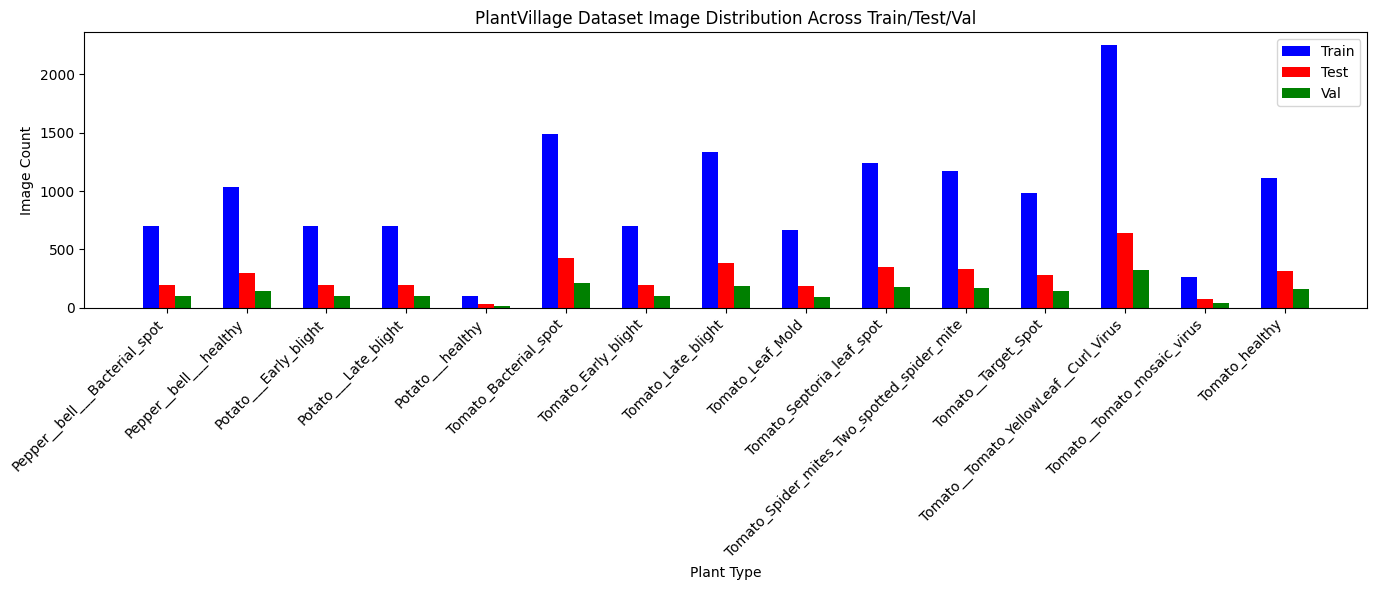

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting data for plotting
plant_types = sorted(set(image_counts["train"].keys()) | set(image_counts["test"].keys()) | set(image_counts["val"].keys()))
x = np.arange(len(plant_types))  # X-axis positions

# Get image counts for each split, defaulting to 0 if plant type is missing
train_counts = [image_counts["train"].get(plant, 0) for plant in plant_types]
test_counts = [image_counts["test"].get(plant, 0) for plant in plant_types]
val_counts = [image_counts["val"].get(plant, 0) for plant in plant_types]

# Bar width and plotting each dataset split
bar_width = 0.2
plt.figure(figsize=(14, 6))
plt.bar(x - bar_width, train_counts, width=bar_width, label="Train", color="blue")
plt.bar(x, test_counts, width=bar_width, label="Test", color="red")
plt.bar(x + bar_width, val_counts, width=bar_width, label="Val", color="green")

# Labels and title
plt.xlabel("Plant Type")
plt.ylabel("Image Count")
plt.title("PlantVillage Dataset Image Distribution Across Train/Test/Val")
plt.xticks(x, plant_types, rotation=45, ha="right")
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


In [9]:
import os
import cv2
import pandas as pd

# Define dataset location
dataset_root = "/content/drive/MyDrive/plant-village-dataset/PlantVillageDataset/train_val_test"
splits = ["train", "test", "val"]

# Initialize results list
image_data = []

# Process each split (train, test, val)
for split in splits:
    split_path = os.path.join(dataset_root, split)

    # Loop through plant categories
    for plant_folder in os.listdir(split_path):
        plant_folder_path = os.path.join(split_path, plant_folder)

        # Ensure it is a directory
        if os.path.isdir(plant_folder_path):
            images = os.listdir(plant_folder_path)[:10]  # Select only first 10 images

            # Process each image
            for img_name in images:
                img_path = os.path.join(plant_folder_path, img_name)
                image = cv2.imread(img_path)

                if image is not None:
                    height, width = image.shape[:2]
                    aspect_ratio = round(width / height, 2)  # Aspect ratio rounded to 2 decimal places

                    # Store image data
                    image_data.append([split, plant_folder, img_name, width, height, aspect_ratio])

# Create a DataFrame for better visualization
df = pd.DataFrame(image_data, columns=["Split", "Plant Type", "Image Name", "Width", "Height", "Aspect Ratio"])

# Display first 10 rows (for quick inspection)
print(df.head(10))


   Split           Plant Type  \
0  train  Tomato_Early_blight   
1  train  Tomato_Early_blight   
2  train  Tomato_Early_blight   
3  train  Tomato_Early_blight   
4  train  Tomato_Early_blight   
5  train  Tomato_Early_blight   
6  train  Tomato_Early_blight   
7  train  Tomato_Early_blight   
8  train  Tomato_Early_blight   
9  train  Tomato_Early_blight   

                                          Image Name  Width  Height  \
0  42d072db-d17e-4050-882a-6a8d1c1ede05___RS_Erly...    256     256   
1  4e8e92ba-46f4-4e49-850b-71019f6c8640___RS_Erly...    256     256   
2  bcae6e76-f374-446e-b5c3-a7d18f1444f6___RS_Erly...    256     256   
3  d344e6d5-259e-4f1c-a72e-919ae9e13005___RS_Erly...    256     256   
4  54a33a0e-3bf6-44de-ba94-8b5096f1cb6e___RS_Erly...    256     256   
5  6f8ac19d-d97f-47ee-8ad4-bb53ab7984a0___RS_Erly...    256     256   
6  258e6e39-d791-482c-921d-65048753770a___RS_Erly...    256     256   
7  1de17623-e625-4a3a-91e8-64973e6d09fd___RS_Erly...    256     256 

In [11]:
import os
import cv2
import pandas as pd

# Define dataset location
dataset_root = "/content/drive/MyDrive/plant-village-dataset/PlantVillageDataset/train_val_test"
splits = ["train", "test", "val"]

# Initialize results list
image_data = []

# Process each split (train, test, val)
for split in splits:
    split_path = os.path.join(dataset_root, split)

    # Loop through plant categories
    for plant_folder in os.listdir(split_path):
        plant_folder_path = os.path.join(split_path, plant_folder)

        # Ensure it is a directory
        if os.path.isdir(plant_folder_path):
            images = os.listdir(plant_folder_path)[:3]  # Select only first 3 images

            # Process each image
            for img_name in images:
                img_path = os.path.join(plant_folder_path, img_name)
                image = cv2.imread(img_path)

                if image is not None:
                    height, width = image.shape[:2]
                    aspect_ratio = round(width / height, 2)  # Aspect ratio rounded to 2 decimal places

                    # Store image data
                    image_data.append([split, plant_folder, img_name, width, height, aspect_ratio])

# Create a DataFrame for better visualization
df = pd.DataFrame(image_data, columns=["Split", "Plant Type", "Image Name", "Width", "Height", "Aspect Ratio"])

# Display full DataFrame (or first few rows for quick inspection)
print(df.head(30))  # Shows results for multiple plants


    Split                                   Plant Type  \
0   train                          Tomato_Early_blight   
1   train                          Tomato_Early_blight   
2   train                          Tomato_Early_blight   
3   train                             Tomato_Leaf_Mold   
4   train                             Tomato_Leaf_Mold   
5   train                             Tomato_Leaf_Mold   
6   train                             Potato___healthy   
7   train                             Potato___healthy   
8   train                             Potato___healthy   
9   train                    Tomato_Septoria_leaf_spot   
10  train                    Tomato_Septoria_leaf_spot   
11  train                    Tomato_Septoria_leaf_spot   
12  train  Tomato_Spider_mites_Two_spotted_spider_mite   
13  train  Tomato_Spider_mites_Two_spotted_spider_mite   
14  train  Tomato_Spider_mites_Two_spotted_spider_mite   
15  train        Tomato__Tomato_YellowLeaf__Curl_Virus   
16  train     